In [2]:
import pandas as pd
import numpy as np

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Customer churn prediction').getOrCreate()
spark

In [4]:
df = spark.read.csv('C:/Users/md.owais/Desktop/Customer Chun Prediction/data/test_churn.csv', inferSchema=True, header=True)

In [5]:
df.show()

+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
| id|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------

Shape

In [6]:
shape = df.count(), len(df.columns)
shape

(750, 20)

Mising Values Analysis

In [7]:
from pyspark.sql.functions import isnan, count, when, col, expr, substring
total_col = df.columns
df.select([count(when( col(c).contains('NA') | col(c).contains('None') \
                      | (col(c) == "NaN") | (col(c) == '') | (col(c) == 'NULL')\
                      | col(c).isNull() | isnan(c) ,c)).alias(c) for c in total_col]).show()

+---+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
| id|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+---+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------------------

Duplicates Records analysis

In [8]:
df.count(), df.distinct().count()

(750, 750)

EDA

In [9]:
# 1. Remove area_code_ from area_code column
# Remove id column


In [10]:
df=df.drop('id')

Removing 'area_code_' from area_code column

In [11]:
df=df.withColumn('area_code', expr("substring(area_code,11,12)"))

In [12]:
df.show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
|

In [13]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)



Convirsion of area code into integer

In [14]:
from pyspark.sql.types import IntegerType, StringType,FloatType,DoubleType
df=df.withColumn('area_code', df['area_code'].cast(IntegerType()))

In [15]:
df.select('area_code').dtypes

[('area_code', 'int')]

Null values using heatmap

In [16]:
import seaborn as sns

<AxesSubplot:>

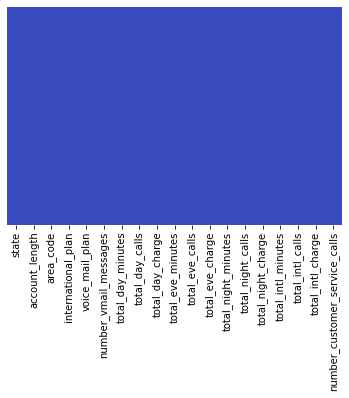

In [17]:
sns.heatmap(df.toPandas().isnull(), yticklabels=False, cbar=False,cmap='coolwarm')

Correlation between Each pairs of feature

<AxesSubplot:>

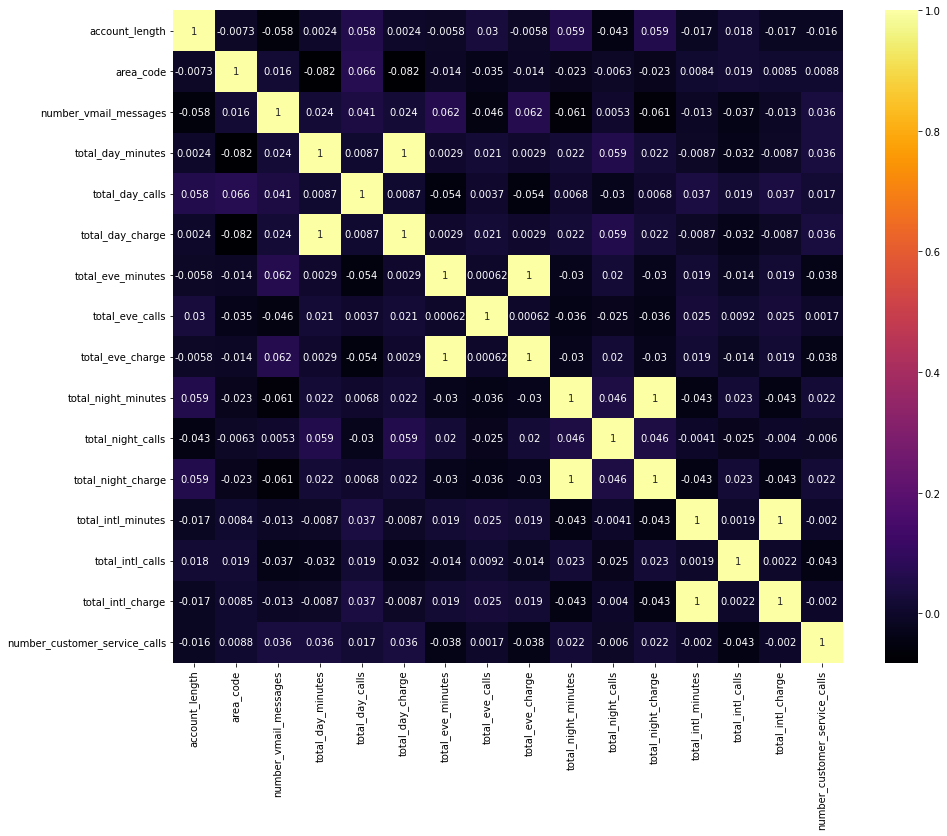

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
fig=sns.heatmap(df.toPandas().corr(), data=df.toPandas(),annot=True,cmap='inferno')
fig

In [19]:
copy_df = df

In [20]:
removal_col = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']

In [21]:
copy_df = copy_df.drop(*(removal_col))

In [22]:
len(copy_df.columns), len(df.columns)

(15, 19)

In [23]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: integer (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)



In [24]:
import plotly.express as px

In [25]:
import seaborn as sns

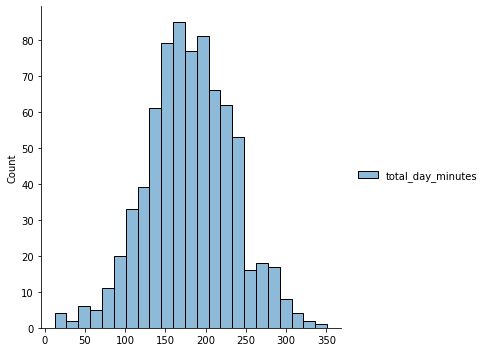

In [29]:
sns.displot(df.select('total_day_minutes').toPandas())